mushroom


Shape of dataset: (8124, 23)
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



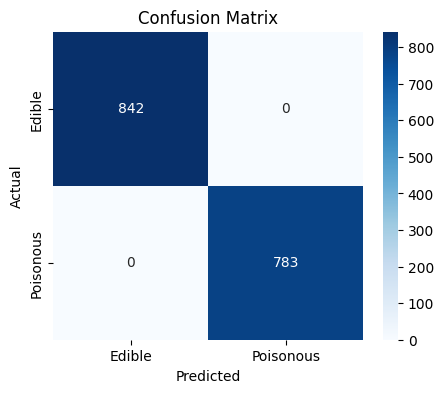

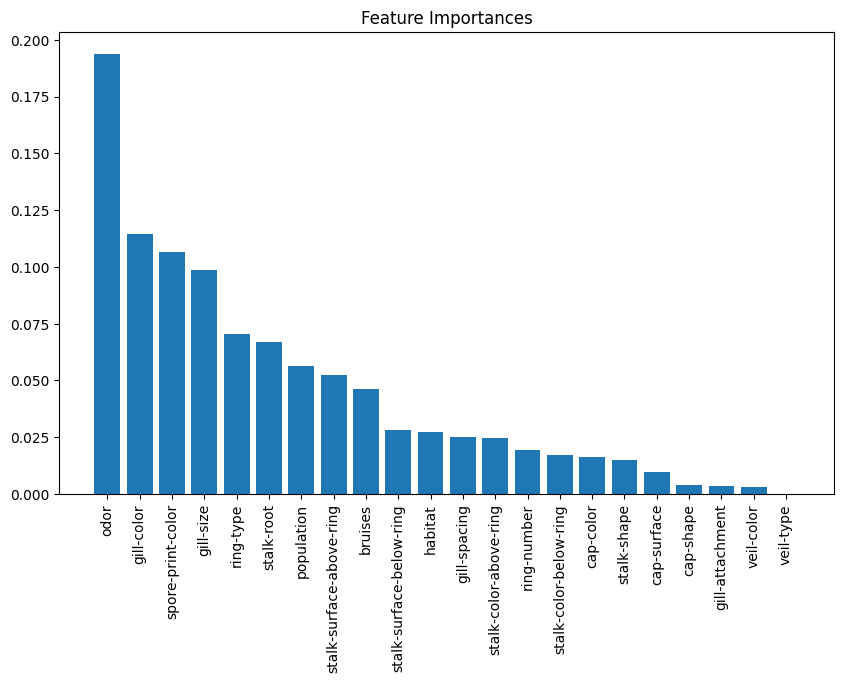

Top 5 important features: Index(['odor', 'gill-color', 'spore-print-color', 'gill-size', 'ring-type'], dtype='object')
Accuracy (Top 5 Features): 0.9938461538461538
Classification Report (Top 5 Features):
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       843
           1       1.00      0.99      0.99       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

Confusion Matrix (Top 5 Features):
 [[843   0]
 [ 10 772]]
Sample Mushroom Prediction: Edible


In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("C:/Users/varsh/Downloads/archive (3)/mushrooms.csv")
print("Shape of dataset:", df.shape)
#print(df.head())

label_encoders = {}
for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

X = df.drop("class", axis=1)
y = df["class"] 


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Edible","Poisonous"], yticklabels=["Edible","Poisonous"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10,6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.show()

importances_series = pd.Series(rf.feature_importances_, index=X.columns)
top_features = importances_series.sort_values(ascending=False).head(5).index
print("Top 5 important features:", top_features)

X_top = df[top_features]
y_top = df["class"]

X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top, y_top, test_size=0.2, random_state=42)

rf_top = RandomForestClassifier(n_estimators=100, random_state=42)
rf_top.fit(X_train_top, y_train_top)

y_pred_top = rf_top.predict(X_test_top)
print("Accuracy (Top 5 Features):", accuracy_score(y_test_top, y_pred_top))
print("Classification Report (Top 5 Features):\n", classification_report(y_test_top, y_pred_top))
print("Confusion Matrix (Top 5 Features):\n", confusion_matrix(y_test_top, y_pred_top))

sample_raw = {
    'odor': 'n',          # no odor
    'gill-color': 'k',    # black
    'spore-print-color': 'r',
    'gill-size': 'b',     # broad
    'ring-type': 'p'      # pendant
}

sample_encoded = [label_encoders[col].transform([sample_raw[col]])[0] for col in top_features]

prediction = rf_top.predict([sample_encoded])
print("Sample Mushroom Prediction:", "Edible" if prediction[0]==0 else "Poisonous")


Credit card


Shape of dataset: (30000, 25)
   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.mo

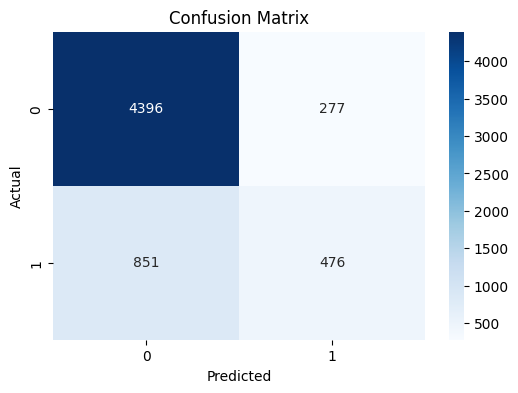

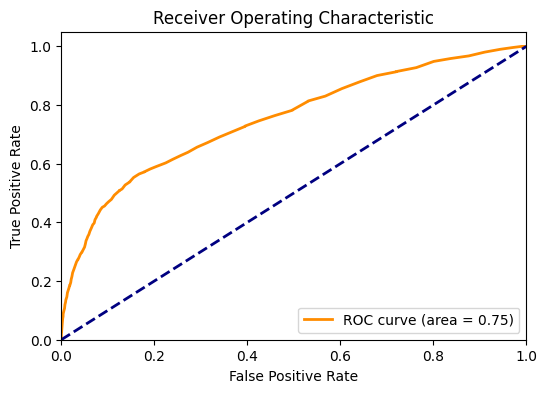

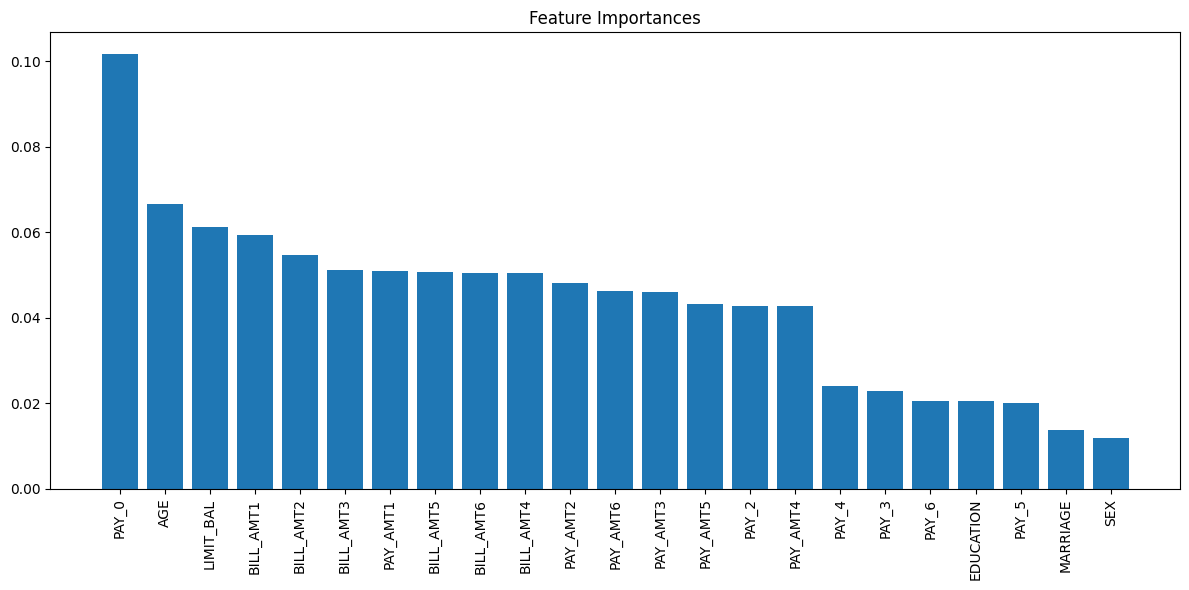

Top 5 important features:
 PAY_0        0.101676
AGE          0.066494
LIMIT_BAL    0.061233
BILL_AMT1    0.059267
BILL_AMT2    0.054614
dtype: float64
Sample Prediction: No Default
Probability of Default: 0.43


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                             confusion_matrix, classification_report, roc_curve, roc_auc_score)

df = pd.read_csv("C:/Users/varsh/Downloads/archive (4)/UCI_Credit_Card.csv")  # replace with your path
print("Shape of dataset:", df.shape)
print(df.head())

print(df.isnull().sum())


if 'ID' in df.columns:
    df = df.drop('ID', axis=1)

X = df.drop('default.payment.next.month', axis=1)
y = df['default.payment.next.month']  


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:,1]


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

feature_importance_series = pd.Series(rf.feature_importances_, index=X.columns)
top_features = feature_importance_series.sort_values(ascending=False).head(5)
print("Top 5 important features:\n", top_features)

sample_customer = np.array([[50000, 35, 5000, 0, 2, 1, 1, 1, 1, 1, 2000, 1500, 0, 0, 1, 0, 1, 0, 0, 0, 0,1,0]]) 
sample_customer_scaled = scaler.transform(sample_customer)
pred_sample = rf.predict(sample_customer_scaled)
prob_sample = rf.predict_proba(sample_customer_scaled)[0][1]

print("Sample Prediction:", "Default" if pred_sample[0]==1 else "No Default")
print("Probability of Default:", round(prob_sample,2))


titanic dataset

Training Data Shape: (891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            3734

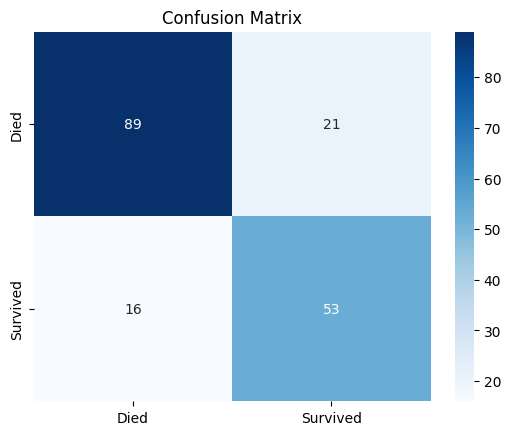

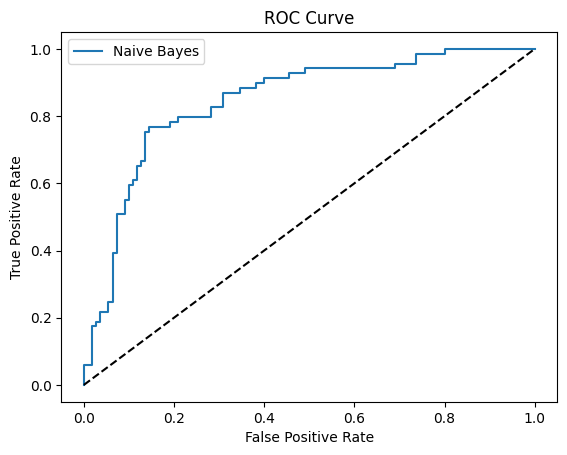

AUC Score: 0.8459815546772068
Submission file saved as titanic_naive_bayes_submission.csv
The passenger would have SURVIVED!


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

train = pd.read_csv("C:/Users/varsh/Downloads/titanic/train.csv")
test = pd.read_csv("C:/Users/varsh/Downloads/titanic/test.csv")

print("Training Data Shape:", train.shape)
print(train.head())


train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

title_map = {
    "Mlle": "Miss", "Ms": "Miss", "Mme": "Mrs",
    "Countess": "Rare", "Lady": "Rare", "Capt": "Rare", "Col": "Rare",
    "Don": "Rare", "Dr": "Rare", "Major": "Rare", "Rev": "Rare",
    "Sir": "Rare", "Jonkheer": "Rare", "Dona": "Rare"
}
train['Title'] = train['Title'].replace(title_map)
test['Title'] = test['Title'].replace(title_map)

train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

train["IsAlone"] = (train["FamilySize"] == 1).astype(int)
test["IsAlone"] = (test["FamilySize"] == 1).astype(int)

train['Age'].fillna(train['Age'].median(), inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)

train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
test['Embarked'].fillna(test['Embarked'].mode()[0], inplace=True)

test['Fare'].fillna(test['Fare'].median(), inplace=True)

train.drop(columns=['PassengerId','Name','Ticket','Cabin'], inplace=True)
test_passenger_id = test['PassengerId']
test.drop(columns=['PassengerId','Name','Ticket','Cabin'], inplace=True)


label_enc = LabelEncoder()
for col in ['Sex','Embarked','Title']:
    train[col] = label_enc.fit_transform(train[col])
    test[col] = label_enc.transform(test[col])


X = train.drop(columns=['Survived'])
y = train['Survived']


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
test_scaled = scaler.transform(test)


nb = GaussianNB()
nb.fit(X_train_scaled, y_train)


y_pred = nb.predict(X_val_scaled)


print("\nEvaluation Metrics:")
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))

cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Died","Survived"], yticklabels=["Died","Survived"])
plt.title("Confusion Matrix")
plt.show()

y_prob = nb.predict_proba(X_val_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
plt.plot(fpr, tpr, label="Naive Bayes")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

print("AUC Score:", roc_auc_score(y_val, y_prob))

test_predictions = nb.predict(test_scaled)
submission = pd.DataFrame({"PassengerId": test_passenger_id, "Survived": test_predictions})
submission.to_csv("titanic_naive_bayes_submission.csv", index=False)
print("Submission file saved as titanic_naive_bayes_submission.csv")

pclass = 3              # Passenger class (1st=1, 2nd=2, 3rd=3)
sex_encoded = 0         # Sex (0 = male, 1 = female)
age = 22                # Age of passenger
sibsp = 1               # Number of siblings/spouses aboard
parch = 0               # Number of parents/children aboard
fare = 7.25             # Ticket fare
embarked_encoded = 0    # Embarked (0 = S, 1 = C, 2 = Q)
title_encoded = 1       # Example: "Mr"=1, "Miss"=2 (depends on LabelEncoder mapping)
family_size = sibsp + parch + 1
is_alone = 1 if family_size == 1 else 0

sample = np.array([[pclass, sex_encoded, age, sibsp, parch, fare,
                    embarked_encoded, title_encoded, family_size, is_alone]])

sample_scaled = scaler.transform(sample)


prediction = nb.predict(sample_scaled)[0]

if prediction == 1:
    print("The passenger would have SURVIVED!")
else:
    print("\n The passenger would NOT have survived.")





Spam

 Dataset Shape: (5572, 2)
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

Training samples: 4457
Testing samples: 1115

Accuracy: 0.9721973094170404
 Precision: 0.9916666666666667
 Recall: 0.7986577181208053

Confusion Matrix:
 [[965   1]
 [ 30 119]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       0.99      0.80      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115



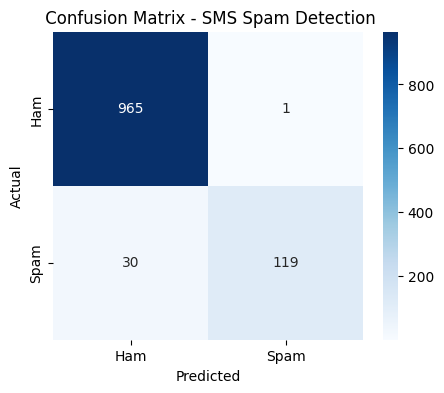

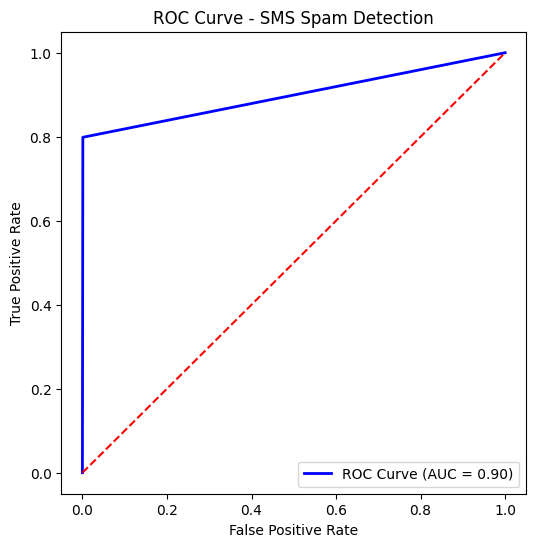

 'Congratulations! You've won a $1000 Walmart gift card. Call now!' → SPAM
 'Hi, are we still meeting for lunch today?' →  HAM (Not Spam)


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report,roc_curve,auc
import string

df = pd.read_csv("C:/Users/varsh/Downloads/archive (5)/spam.csv", encoding="latin-1")

df = df[['v1', 'v2']] 
df.columns = ['label', 'message']

print(" Dataset Shape:", df.shape)
print(df.head())

df['label'] = df['label'].map({'ham': 0, 'spam': 1})

def clean_text(text):
    text = text.lower()                            
    text = text.translate(str.maketrans('', '', string.punctuation)) 
    return text

df['message'] = df['message'].apply(clean_text)

X = df['message']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nTraining samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


model = MultinomialNB()
model.fit(X_train_vec, y_train)

y_pred = model.predict(X_test_vec)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("\nAccuracy:", accuracy)
print(" Precision:", precision)
print(" Recall:", recall)

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(" Confusion Matrix - SMS Spam Detection")
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Random line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SMS Spam Detection")
plt.legend(loc="lower right")
plt.show()


def predict_message(msg):
    msg_clean = clean_text(msg)
    msg_vec = vectorizer.transform([msg_clean])
    pred = model.predict(msg_vec)[0]
    if pred == 1:
        print(f" '{msg}' → SPAM")
    else:
        print(f" '{msg}' →  HAM (Not Spam)")

predict_message("Congratulations! You've won a $1000 Walmart gift card. Call now!")
predict_message("Hi, are we still meeting for lunch today?")


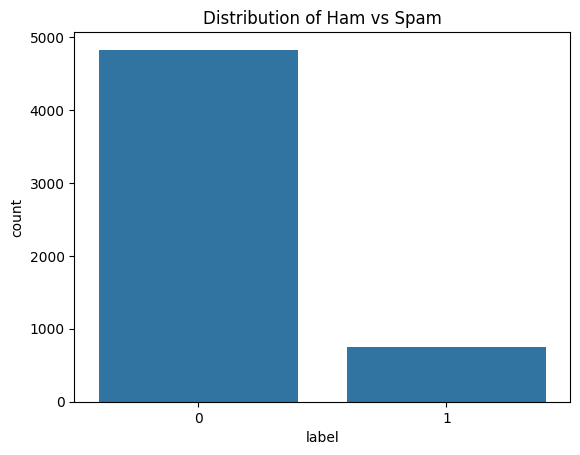

In [27]:
sns.countplot(x=df['label'])
plt.title("Distribution of Ham vs Spam")
plt.show()

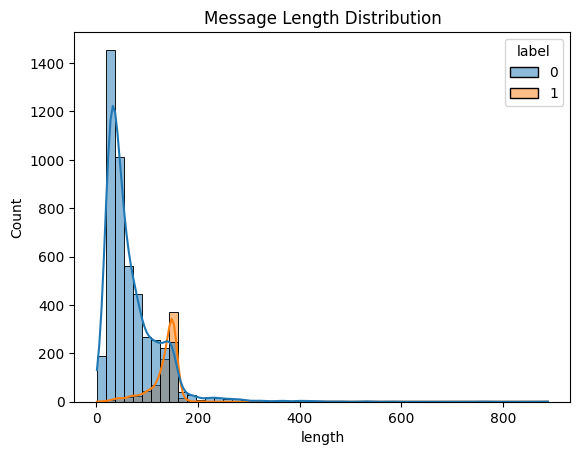

In [28]:
df['length'] = df['message'].apply(len)
sns.histplot(data=df, x='length', hue='label', bins=50, kde=True)
plt.title("Message Length Distribution")
plt.show()